In [3]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import scipy.special as scp #for using the binomial coefficient in the Bernstein basis polynomials
from PIL import Image

# Math 387 Lab Final
David Knapik (260607757)
4/19/18


The function we deal with is
$$f_a(x)= \begin{cases} x^a , \qquad x>0 \\ 0 , \qquad x \leq 0  \end{cases}$$

## Exercise 1

Exercise 1 is found in the pdf file in my GitHub repository.

## Exercise 2

In [4]:
def fa(a,x):  #Define the piecewise function f_a(x), which outputs an array
    conditions = [x>0,x<=0]
    values = [lambda x: x**a, 0]
    
    return np.piecewise(x,conditions,values)

In [5]:
def Createequal(n): #positive integer n; creates equidistant nodes in [-1,1]
    x = np.linspace(-1,1,n)
    
    return np.array(x)

In [6]:
def GetMidpoints(X): #argument is an array X; returns midpoints of each subinterval
    return (X[1:] + X[:-1]) / 2

In [7]:
def PiecewiseConstApprox(x,X,a): #define our piecewise constant approximation of our function
    midpts = GetMidpoints(X)
    conditions = []
    values = []
    l= len(X)
    l2 = len(midpts)
    
    for j in range(l-1):
        conditions.append((x>X[j])&(x<=X[j+1]))
        
    for k in range(l2):
        values.append(fa(a,midpts[k]))
        
    return np.piecewise(x,conditions,values)

Examples of the piecewise constant approximation:

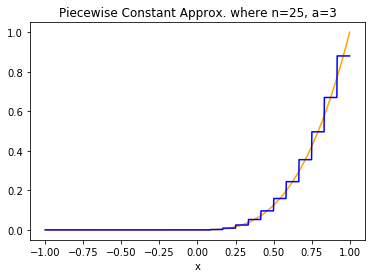

In [8]:
n=25
a=3

X = Createequal(n)

x = np.linspace(-1,1,1000)
y = PiecewiseConstApprox(x,X,a)

ex = np.linspace(-1,1,1000)
ey = fa(a,ex)

plt.plot(ex,ey,color="orange")
plt.plot(x,y,color="blue") #Blue will be the color we use for the approximation.
plt.title("Piecewise Constant Approx. where n=25, a=3")
plt.xlabel("x")
plt.show()

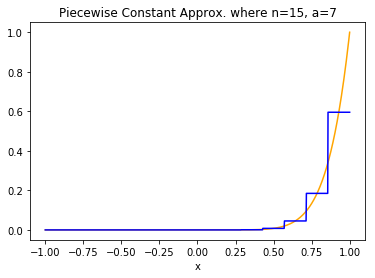

In [9]:
n=15
a=7

X = Createequal(n)

x = np.linspace(-1,1,1000)
y = PiecewiseConstApprox(x,X,a)

ex = np.linspace(-1,1,1000)
ey = fa(a,ex)

plt.plot(ex,ey,color="orange")
plt.plot(x,y,color="blue")
plt.title("Piecewise Constant Approx. where n=15, a=7")
plt.xlabel("x")
plt.show()

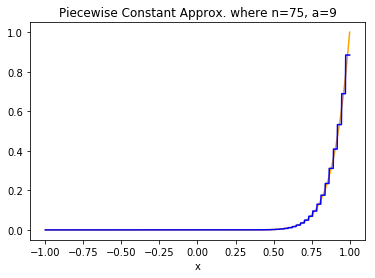

In [10]:
n=75
a=9

X = Createequal(n)

x = np.linspace(-1,1,1000)
y = PiecewiseConstApprox(x,X,a)

ex = np.linspace(-1,1,1000)
ey = fa(a,ex)

plt.plot(ex,ey,color="orange")
plt.plot(x,y,color="blue")
plt.title("Piecewise Constant Approx. where n=75, a=9")
plt.xlabel("x")
plt.show()

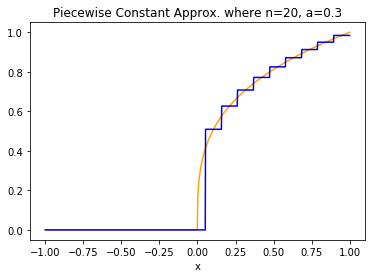

In [53]:
n=20
a=0.3

X = Createequal(n)

x = np.linspace(-1,1,1000)
y = PiecewiseConstApprox(x,X,a)

ex = np.linspace(-1,1,1000)
ey = fa(a,ex)

plt.plot(ex,ey,color="orange")
plt.plot(x,y,color="blue")
plt.title("Piecewise Constant Approx. where n=20, a=0.3")
plt.xlabel("x")
plt.show()

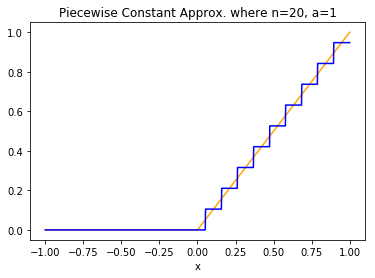

In [11]:
n=20
a=1

X = Createequal(n)

x = np.linspace(-1,1,1000)
y = PiecewiseConstApprox(x,X,a)

ex = np.linspace(-1,1,1000)
ey = fa(a,ex)

plt.plot(ex,ey,color="orange")
plt.plot(x,y,color="blue")
plt.title("Piecewise Constant Approx. where n=20, a=1")
plt.xlabel("x")
plt.show()

 We now implement a procedure to approximately compute the error of the approximation in the maximum norm. We note that from the above examples, it is clear that if $a<1$, the largest error occurs at the first subinterval after $x=0$. Conversely, if $a>1$, the greatest error occurs at the last subinterval. (if $a=1$ the greatest error is equal at the first and last subinterval after $x=0$). So our procedure is:

In [55]:
def MaxError(a,X): #compute (aprroximately) the error of the approximation in the maximum norm
    midpts = GetMidpoints(X)
    l1 = len(X)
    l2 = len(midpts)
    
    if a>=1:
        result = fa(a,midpts[l2-1]) - fa(a,X[l1-2])
        return result

    else:
        X = X[X>0]
        result2 = fa(a,X[0]) - 0
        return result2

Now, we estimate the rate of convergence for $a=0.5$.

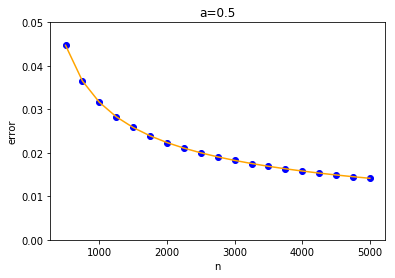

In [56]:
X=[]
j=500
while j<= 5000:
    X.append(Createequal(j))
    j=j+250
    
Y = []
for y in X:
    Y.append(MaxError(0.5,y)) 
       
dx = np.array(range(500,5001,250))  

realy = []
for y in dx:
    realy.append(1/((y)**0.5))


plt.scatter(dx,Y,color="blue")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.05))
plt.title("a=0.5")
plt.show()

From the plot, we have that the rate of convergence for $a=0.5$ is $r \approx 0.5$.

Now, we estimate the rate of convergence for $a=0.7$.

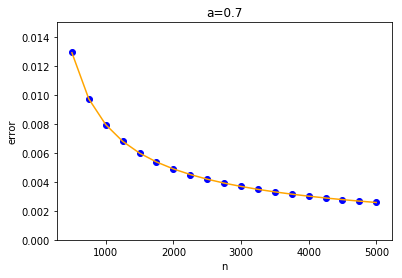

In [57]:
X=[]
j=500
while j<= 5000:
    X.append(Createequal(j))
    j=j+250
    
Y = []
for y in X:
    Y.append(MaxError(0.7,y)) 
       
dx = np.array(range(500,5001,250))  

realy = []
for y in dx:
    realy.append(1/((y)**0.7))


plt.scatter(dx,Y,color="blue")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.0150))
plt.title("a=0.7")
plt.show()

From the plot, we have that the rate of convergence for $a=0.7$ is $r \approx 0.7$.

Now, for $a=0.9$:

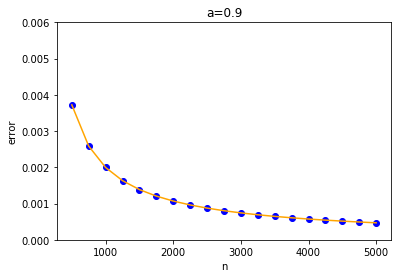

In [58]:
X=[]
j=500
while j<= 5000:
    X.append(Createequal(j))
    j=j+250
    
Y = []
for y in X:
    Y.append(MaxError(0.9,y)) 
       
dx = np.array(range(500,5001,250))  

realy = []
for y in dx:
    realy.append(1/((y)**0.9))


plt.scatter(dx,Y,color="blue")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.006))
plt.title("a=0.9")
plt.show()

From the plot, we have that the rate of convergence for $a=0.9$ is $r \approx 0.9$.

Now, for $a=1.1$:

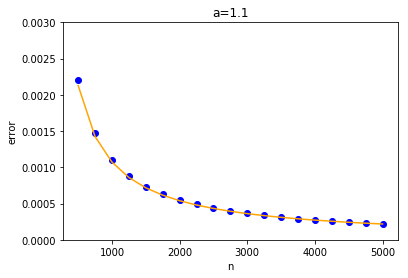

In [59]:
X=[]
j=500
while j<= 5000:
    X.append(Createequal(j))
    j=j+250
    
Y = []
for y in X:
    Y.append(MaxError(1.1,y)) 
       
dx = np.array(range(500,5001,250))  

realy = []
for y in dx:
    realy.append(1/((y)**0.99))


plt.scatter(dx,Y,color="blue")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.003))
plt.title("a=1.1")
plt.show()

From the plot, we have that the rate of convergence for $a=1.1$ is $r \approx 0.99$.

Now, for $a=1.3$:

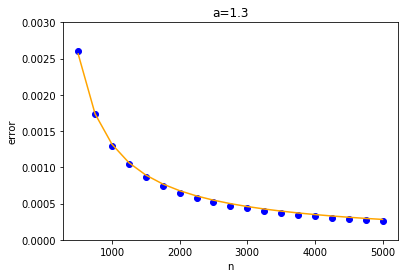

In [60]:
X=[]
j=500
while j<= 5000:
    X.append(Createequal(j))
    j=j+250
    
Y = []
for y in X:
    Y.append(MaxError(1.3,y)) 
       
dx = np.array(range(500,5001,250))  

realy = []
for y in dx:
    realy.append(1/((y)**.96))


plt.scatter(dx,Y,color="blue")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.003))
plt.title("a=1.3")
plt.show()

From the plot, we have that the rate of convergence for $a=1.3$ is $r \approx 0.96$.

Finally, for $a=1.5$:

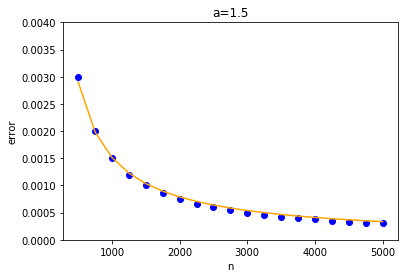

In [61]:
X=[]
j=500
while j<= 5000:
    X.append(Createequal(j))
    j=j+250
    
Y = []
for y in X:
    Y.append(MaxError(1.5,y)) 
       
dx = np.array(range(500,5001,250))  

realy = []
for y in dx:
    realy.append(1/((y)**.94))


plt.scatter(dx,Y,color="blue")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.004))
plt.title("a=1.5")
plt.show()

From the plot, we have that the rate of convergence for $a=1.5$ is $r \approx 0.94$.

So, it seems that if $a<1$, the dependence is $r=a$, while for $a \geq 1$, the dependence is $r = 1$. The rate of convergence thus has a dependence on the regularity of the function. For $a<1$, we have issues at $x=0$, which results in a larger error of the approximation in the maximum norm and thus a smaller rate of convergence. In the context of approximation theory, this makes sense since irregularity in the form of a cusp and rapid increase means that the midpoint rule results in a piecewise constant portion that has value much different from the actual curve values in a small neighborhood. 

## Exercise 3

In [14]:
def f(a,x):  #Again, define the piecewise function f_a(x); here we dont want the output to be an array though.
    return x**a if x > 0 else 0

In [343]:
def PiecewiseLinearInterpPlot(n,a): #define our continuous piecewise linear function
    x = np.arange(-1, 1, 0.01)
    realy = np.zeros((x.shape[0],))
    
    for (index, xval) in enumerate(x):
        realy[index] = f(a,xval)

    plt.plot(x,realy,color="orange")
    
    
    
    for j in range(0, n):
        c = (j/n)*2-1
        d = ((j+1)/n)*2-1
        slope = (f(a,d)-f(a,c)) / (d - c)
        interpolate = lambda x:  f(a,c) + slope * (x - c)
        
        x = np.arange(c, d, 0.01)
        y = (np.vectorize(interpolate)) (x)
        plt.plot(x, y,color="green") #green will be the color we use for the approximation.
    
    plt.title("Piecewise Linear Interp. where n=" +str(n)+","+"a="+str(a))
    plt.xlabel("x")
    plt.show()

A couple of illustrative examples with different $a$ and $n$:

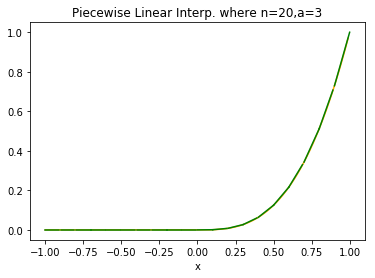

In [344]:
PiecewiseLinearInterpPlot(20,3)

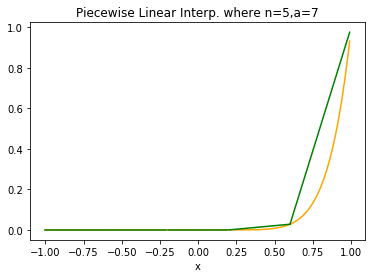

In [345]:
PiecewiseLinearInterpPlot(5,7)

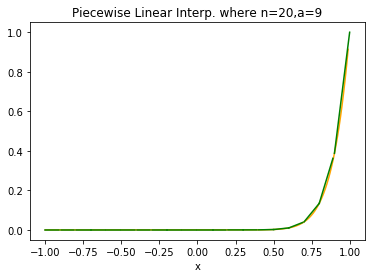

In [346]:
PiecewiseLinearInterpPlot(20,9)

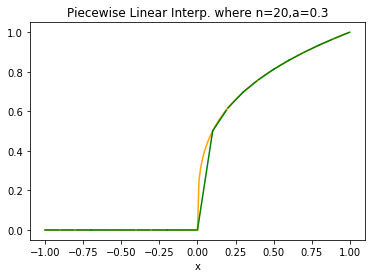

In [347]:
PiecewiseLinearInterpPlot(20,0.3)

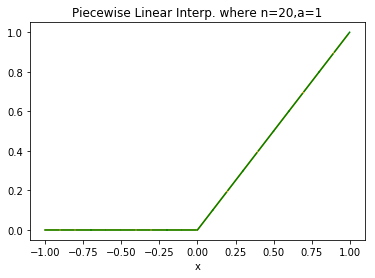

In [348]:
PiecewiseLinearInterpPlot(20,1)

We now implement a procedure to approximately compute the error of the approximation in the maximum norm:

In [253]:
def MaxError3(n,a): #compute (aprroximately) the error of the approximation in the maximum norm
    x = np.arange(-1, 1, n)
    errors = []
    
    for j in range(0, n):
        c = (j/n)*2-1
        d = ((j+1)/n)*2-1
        slope = (f(a,d)-f(a,c)) / (d - c)
        interpolate = lambda x:  f(a,c) + slope * (x - c)
        errors.append(interpolate((c+d)/2)-f(a,(c+d)/2))
        
    return np.amax(np.absolute(errors))

Now, we estimate the rate of convergence for $a=1.5$:

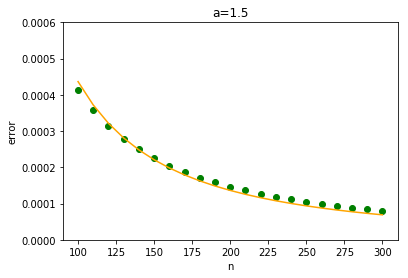

In [254]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError3(j,1.5))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**1.68)))


plt.scatter(dx,Y,color="green")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.0006))
plt.title("a=1.5")
plt.show()

From the plot, we have that the rate of convergence for $a=1.5$ is $r \approx 1.68$.

Now for $a=1.7$:

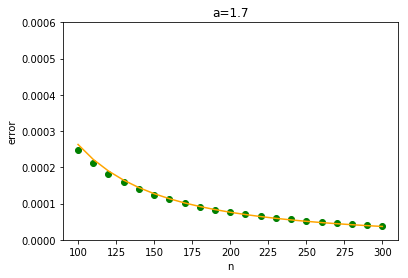

In [255]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError3(j,1.7))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**1.79)))


plt.scatter(dx,Y,color="green")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.0006))
plt.title("a=1.7")
plt.show()

From the plot, we have that the rate of convergence for $a=1.7$ is $r \approx 1.79$.

Now for $a=1.9$:

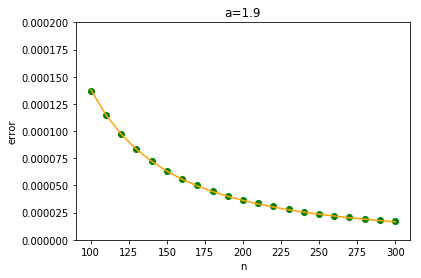

In [256]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError3(j,1.9))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**1.93)))


plt.scatter(dx,Y,color="green")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.0002))
plt.title("a=1.9")
plt.show()

From the plot, we have that the rate of convergence for $a=1.9$ is $r \approx 1.93$.

Now for $a=2.1$:

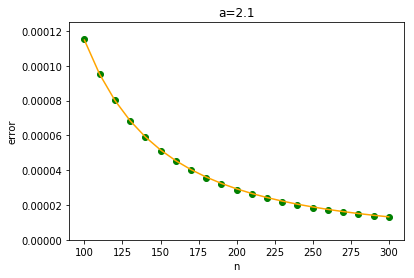

In [257]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError3(j,2.1))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**1.97)))


plt.scatter(dx,Y,color="green")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.000125))
plt.title("a=2.1")
plt.show()

From the plot, we have that the rate of convergence for $a=2.1$ is $r \approx 1.97$.

Now for $a=2.3$:

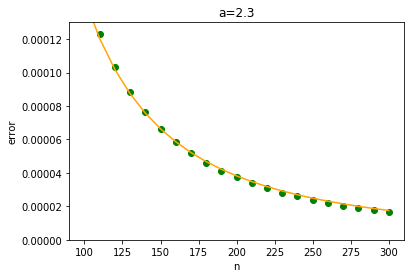

In [258]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError3(j,2.3))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**1.92)))


plt.scatter(dx,Y,color="green")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.00013))
plt.title("a=2.3")
plt.show()

From the plot, we have that the rate of convergence for $a=2.3$ is $r \approx 1.92$.

So, it seems that (around $a=2$) the dependence is $r \approx a$. This is a different behaviour from Exercise 2, whose rate of convergence did not increase past $1$. In the context of approximation theory, this behaviour makes sense given the limitations of using a piecewise constant function to approximate a continuous function. We definitely expect that continuous piecewise linear approximation would behave better than piecewise constant approximation, and indeed this is the case, given the increase in rate of convergence as well as the order of magnitude smaller errors we see in the "error vs n" plots. 

## Exercise 4

In [172]:
def BernBasisPoly(v,n): #the Bernstein basis polynomial of degree n
    return lambda x: scp.binom(n,v)*(x**v)*((1-x)**(n-v))

In [349]:
def BernPolyPlot(n,a): #the Bernstein polynomial of degree n for f_a
    x = np.arange(-1, 1, 0.01)
    realy = np.zeros((x.shape[0],))
    
    for (index, xval) in enumerate(x):
        realy[index] = f(a,xval)

    plt.plot(x,realy,color="orange")
    


    y = np.zeros((x.shape[0],))
    for (index, j) in enumerate(x):
        if (j < 0):
            continue
        for v in range(0, n+1):
            y[index] = y[index] + f(a,v/n) * (BernBasisPoly(v, n)(j))
            
    
    plt.plot(x, y, color="black")
    plt.title("Bernstein Poly for f where n=" +str(n)+","+"a="+str(a))
    plt.xlabel("x")
    plt.show()   

A couple of illustrative examples with different $a$ and $n$:

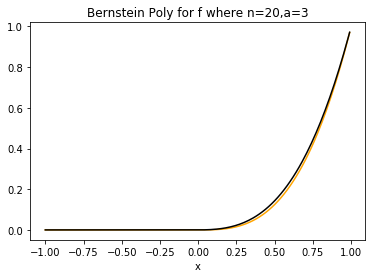

In [350]:
BernPolyPlot(20,3)

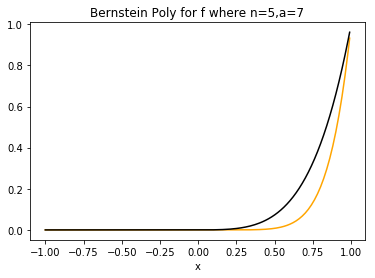

In [351]:
BernPolyPlot(5,7)

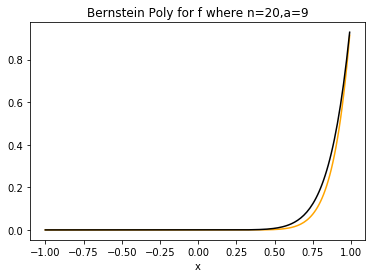

In [352]:
BernPolyPlot(20,9)

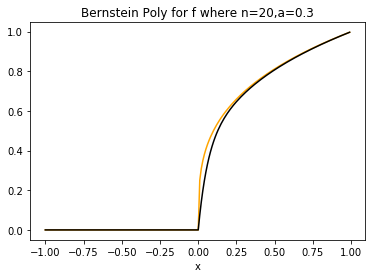

In [353]:
BernPolyPlot(20,0.3)

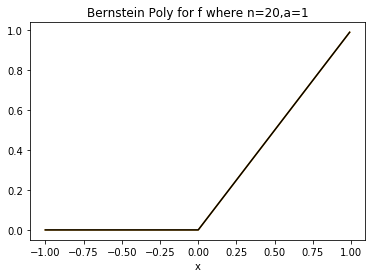

In [354]:
BernPolyPlot(20,1)

We now implement a procedure to approximately compute the error of the approximation in the maximum norm:

In [355]:
def MaxError4(n,a): #compute (aprroximately) the error of the approximation in the maximum norm
    x = np.arange(-1, 1, 0.01)
    realy = np.zeros((x.shape[0],))
    errors = np.zeros((x.shape[0],))
    
    for (index, xval) in enumerate(x):
        realy[index] = f(a,xval)


    y = np.zeros((x.shape[0],))
    for (index, j) in enumerate(x):
        if (j < 0):
            continue
        for v in range(0, n+1):
            y[index] = y[index] + f(a,v/n) * (BernBasisPoly(v, n)(j))
            errors = abs(realy[index] - y[index])
            
    return np.amax(errors)

Now, we estimate the rate of convergence for $a=0.5$:

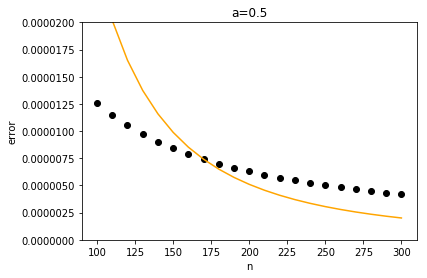

In [356]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError4(j,0.5))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**2.3)))


plt.scatter(dx,Y,color="black")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.00002))
plt.title("a=0.5")
plt.show()

From the plot, we see that the error of the approximation does not quite behave like $n^{-r}$. In fact, the error is a bit closer to a linear behaviour. This perhaps arises due to irregularities at the kink at $x=0$, since Bernstein polynomials are a smooth curve, resulting in an error that does not rapidly decrease with higher $n$.

Now for $a=0.9$:

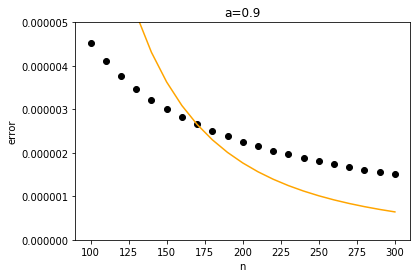

In [266]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError4(j,0.9))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**2.5)))


plt.scatter(dx,Y,color="black")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.000005))
plt.title("a=0.9")
plt.show()

Again since here $a<1$,  the error is a bit closer to a linear behaviour.

Now, for $a=1.5$:

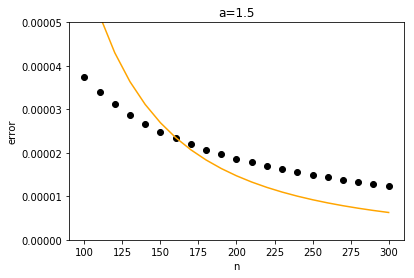

In [267]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError4(j,1.5))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**2.1)))


plt.scatter(dx,Y,color="black")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.00005))
plt.title("a=1.5")
plt.show()

Here we still have a slight kink near $x=0$ and the error is a bit closer to a linear behaviour. We definitely have some new features in this exercise as compared to the previous ones. The first thing to notice is that we have overall errors (seen in the "error vs n" plots) that are up to an order of magnitude smaller then the previous exercises. In the context of approximation theory, this makes sense since we expect smooth continuous curves to approximate a relatively smooth continuous curve better than constant or linear curves. Another new feature that we see is that we dont have a constant or strictly decreasing overall error with increasing $a$. In fact, the errors for $a=0.9$ are smaller than that of $a=1.5$. 

## Exercise 5

In [16]:
def ChebyPoly(n): #trigonometric definition of the Chebyshev polynomial
    return lambda x: np.cos(n*np.arccos(x))

In [17]:
def ChebyInterpPolyPlot(deg,a): #the Chebyshev interpolation polynomial for f_a
    xmin = -1.0
    xmax = 1.0
    nodes = np.zeros((deg+1,))
    coeff = np.zeros((deg+1,))
    x = np.arange(xmin,xmax,0.01)
    realy = np.zeros((x.shape[0],))
    
    for (index, xval) in enumerate(x):
        realy[index] = f(a,xval)

    plt.plot(x,realy,color="orange")
    
                     
    
    
    
    for j in range(0,deg+1):
        nodes[j] = np.cos((np.pi*(1+(2*j))/(2+2*deg)))
                     
    for k in range(0, deg+1):
        coeff[0] = coeff[0] + f(a,nodes[k])
        
    coeff[0] = coeff[0]*(1/(1+deg)) 
                                
    for l in range(1, deg+1):
        for m in range(0, deg+1):
            coeff[l] = coeff[l] + f(a,nodes[m]) * (ChebyPoly(l)(nodes[m]))
        coeff[l] = (2 / (deg + 1)) * coeff[l]
    
    
    y = np.zeros((x.shape[0],))
    for (index, xval) in enumerate(x):
        for j in range(0, deg+1):
            y[index] = y[index] + coeff[j] * (ChebyPoly(j)(xval))
        

    

    
    plt.plot(x, y, color="purple")
    plt.title("Chebyshev Interp. Poly for f where n=" +str(deg)+","+"a="+str(a))
    plt.xlabel("x")
    plt.show()

A couple of illustrative examples with different $a$ and $n$:

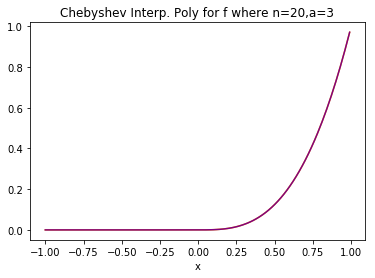

In [358]:
ChebyInterpPolyPlot(20,3)

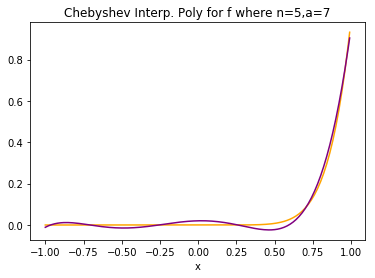

In [359]:
ChebyInterpPolyPlot(5,7)

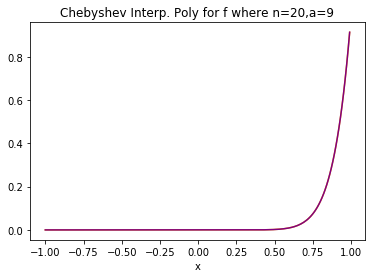

In [310]:
ChebyInterpPolyPlot(20,9)

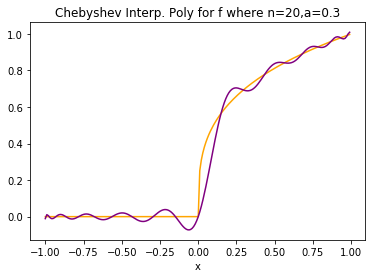

In [311]:
ChebyInterpPolyPlot(20,0.3)

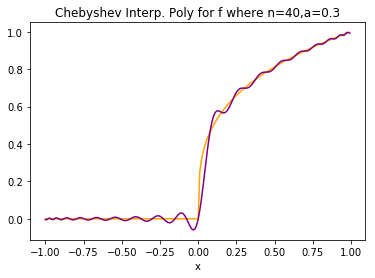

In [312]:
ChebyInterpPolyPlot(40,0.3)

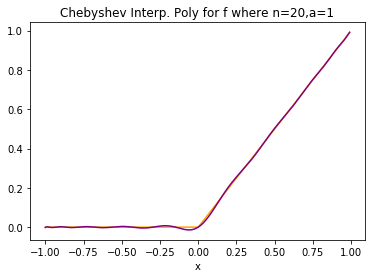

In [313]:
ChebyInterpPolyPlot(20,1)

We now implement a procedure to approximately compute the error of the approximation in the maximum norm:

In [12]:
def MaxError5(deg,a): #compute (aprroximately) the error of the approximation in the maximum norm
    xmin = -1.0
    xmax = 1.0
    nodes = np.zeros((deg+1,))
    coeff = np.zeros((deg+1,))
    x = np.arange(xmin,xmax,0.01)
    errors = np.zeros((x.shape[0],))
    realy = np.zeros((x.shape[0],))
    
    for (index, xval) in enumerate(x):
        realy[index] = f(a,xval)

    plt.plot(x,realy,color="orange")
    
                     
    
    
    
    for j in range(0,deg+1):
        nodes[j] = np.cos((np.pi*(1+(2*j))/(2+2*deg)))
                     
    for k in range(0, deg+1):
        coeff[0] = coeff[0] + f(a,nodes[k])
        
    coeff[0] = coeff[0]*(1/(1+deg)) 
                                
    for l in range(1, deg+1):
        for m in range(0, deg+1):
            coeff[l] = coeff[l] + f(a,nodes[m]) * (ChebyPoly(l)(nodes[m]))
        coeff[l] = (2 / (deg + 1)) * coeff[l]
    
    
    y = np.zeros((x.shape[0],))
    for (index, xval) in enumerate(x):
        for j in range(0, deg+1):
            y[index] = y[index] + coeff[j] * (ChebyPoly(j)(xval))
            
    for (index, _) in enumerate (x):
        errors[index] = abs(realy[index] - y[index])
   
            
    return np.amax(errors)

Now, we estimate the rate of convergence for $a=0.5$:

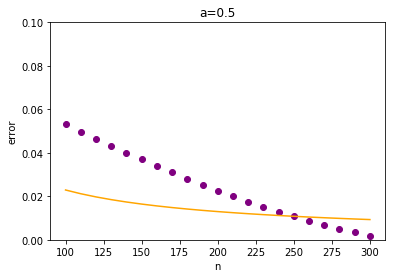

In [362]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError5(j,0.5))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**0.82)))


plt.scatter(dx,Y,color="purple")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.1))
plt.xlim((90,310))
plt.title("a=0.5")
plt.show()

We now see that the error of the approximation does not  behave like $n^{-r}$. In fact, the error is quite linear.

For $a=0.9$:

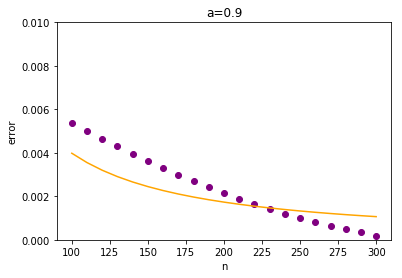

In [338]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError5(j,0.9))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**1.2)))


plt.scatter(dx,Y,color="purple")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.01))
plt.xlim((90,310))
plt.title("a=0.9")
plt.show()

For $a=1.5$:

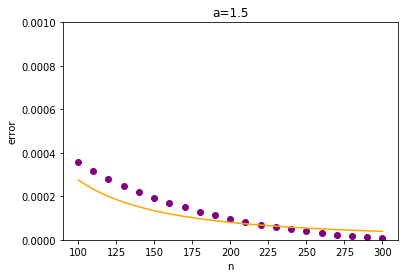

In [341]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError5(j,1.5))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(1/((y**1.78)))


plt.scatter(dx,Y,color="purple")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.001))
plt.xlim((90,310))
plt.title("a=1.5")
plt.show()

Given the apparent linear behaviour, lets try replotting with the fit curve being of form $A+Cn$ for some constants $A,C$.

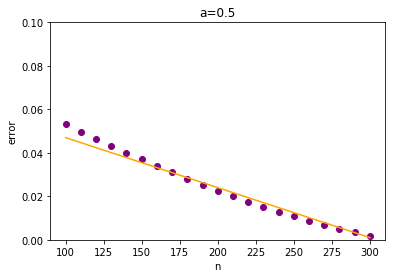

In [39]:
Y=[]
j=100
while j<= 300:
    Y.append(MaxError5(j,0.5))
    j=j+10
    

       
dx = np.array(range(100,301,10))  

realy = []
for y in dx:
    realy.append(0.07-0.00023*y)


plt.scatter(dx,Y,color="purple")
plt.plot(dx,realy,color="orange")
plt.xlabel("n")
plt.ylabel("error")
plt.ylim((0,0.1))
plt.xlim((90,310))
plt.title("a=0.5")
plt.show()

Indeed a linear fit is more appropriate. We note that the Chebyshev interpolation deals with the irregularities much better than the previous exercises. This is most likely due to the excellent choice of the Chebyshev nodes. Here, we also have that as $a$ increases, the overall error decreases, so the linear fit will have a smaller and smaller $y$ intercept. So, for higher values of $a$, the Chebyshev interpolation is definitely the best of the methods we have considered in this lab.